*SMTB-2021: A Glimpse into Algorithms | Alexey Bochkarev* ([🖂](mailto:a@bochkarev.io), [🌐](https://www.bochkarev.io/contact)) `[DRAFT]`

# Where we are? <a class="tocSkip">
- Welcome!
- Course [outline](./README.org) and logistics/tech.
  + ✅ **Topic 1:** we will try *designing* algorithms, taking sorting problem as an example (and using several approaches you might have heared about).
  + ✅ **Topic 2:** we will discuss more systematically how to compare algorithms, focusing on the concept of runtime.
  + ✅ **Topic 3:** a specific example of a more "biological" algorithm (aligning sequences),
  + 👉 **Topic 4:** let's talk data structures.

**So,** we know how to characterize algorithms:
- correctness,
- worst-/average-/best-case runtimes,
- big O notation (and friends),
- memory requirements.

(and know there are "hard" problems, and there are limits to what we can achieve.)

Also, we are not that scared of **Dynamic Programming** any more (well, we know it takes practice, but hey, nothing special, right?..)

## Today, Topic 4:
- **Data structures** or "consumer's point of view on CS",
- ... and a brief conclusion.

In [1]:
# import some libraries first
import numpy as np # numbers/arrays manipulation
from time import time # to check runtimes
import pandas as pd # data/tables manipulation
from math import log, log2
# now, some graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Usually what we mean by **data structure** is: an abstract description of a data type. E.g., the stuff that keeps an ordered list of $N$ elements, requires $O(N)$ space, and supports:
- `access`($i$) -- accesses the $i$-th element, in $O(1)$ time;
- `modify`($i,e$) -- sets the $i$-th element to $e$, in $O(1)$ time;
- `delete`($i$) -- deletes the $i$-th element, in $O(N)$ time,
- `insert`($i,e$) -- inserts the element $e$ after position $i$, in $O(N)$ time.

Which is ... ?

In [2]:
# well, yes
A = np.array(["el-1","el-2","el-3","el-4","el-5"])
print(f"A[2]={A[2]}")

A[2]=el-3


In [4]:
# ... and if we want to change it:
A[2] = "el-E"
print(f"now A[2]={A[2]}")

now A[2]=el-E


What if I wanted to insert often (say, within a loop), after the last element -- but would be okay with compromising on the `access` runtime? 

In [15]:
D = []
runtimes = []
for i in range(10000):
    t0 = time()
    for k in range(10):
        D = D + ["my new element"]
    t1 = time()
    runtimes.append(t1-t0)

In [46]:
D[-5:]

['my new element',
 'my new element',
 'my new element',
 'my new element',
 'my new element']

In [47]:
len(D)

100000

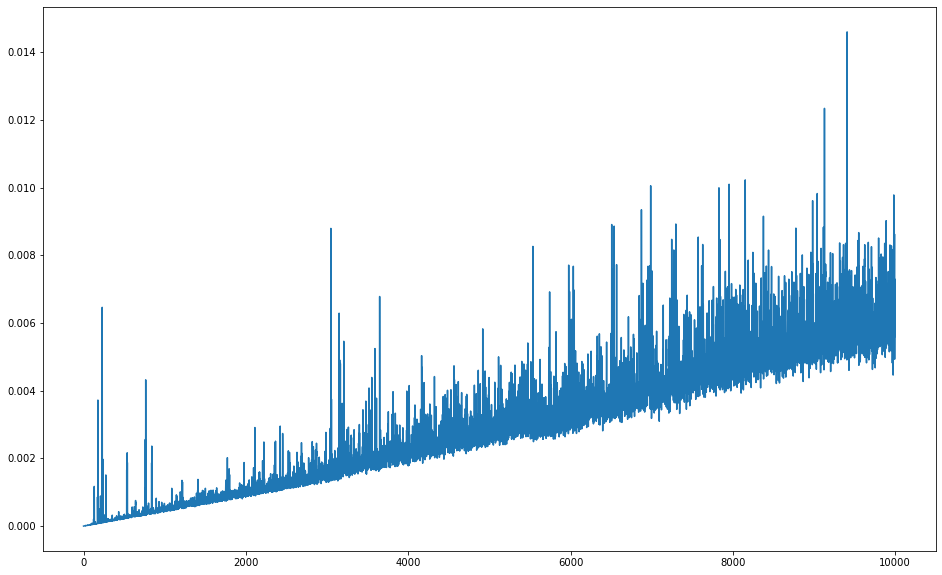

In [48]:
plt.figure(figsize = (16,10))
plt.plot(runtimes)

Now, enter **link lists**. For every number, let's just keep a pointer to the next number:

<img src="img/linked_list.png" alt="Linked list illustration" style="width: 800px;"/>

In [10]:
class MyNode:
    """Describes a node in the linked list."""
    
    def __init__(self, data, next_node):
        """Constructor: invoked when the object is created."""
        self.my_data = data
        self.next_node = next_node
        
    def find(self, what):
        """Finds for ``what`` in this or next nodes)"""
        if self.my_data == what:
            return self
        else:
            if self.next_node is None:
                return None
            else:
                return self.next_node.find(what)

    def __str__(self):
        """An auxiliary function, so we could just print(MyNode)"""
        return self.my_data

In [11]:
class MyLinkedList:
    """Describes a simplistic Linked List data structure."""
    
    def __init__(self, root_data):
        """Constructor: invoked when the new linked list is created"""
        self.root = MyNode(data = root_data, next_node = None)
        self.last = self.root
        
    def find(self, what):
        """Finds ``what`` in the linked list."""
        return self.root.find(what)
    
    def append(self, with_what):
        """Appends ``with_what`` to the end of the linked list."""
        self.last.next_node = MyNode(with_what, next_node = None)
        self.last = self.last.next_node

In [12]:
# let's test it
my_list = MyLinkedList("I am root")
my_list.append("Next el 1")
my_list.append("Next el 2")

print("Finding 'Next el 1': {}".format(my_list.find("Next el 1")))
print("Finding 'Next el 3': {}".format(my_list.find("Next el 3")))

Finding 'Next el 1': Next el 1
Finding 'Next el 3': None


In [16]:
my_list = MyLinkedList("I am root")

ll_runtimes = []
for i in range(10000):
    t0 = time()
    for k in range(10):
        my_list.append("new element")
    t1 = time()
    ll_runtimes.append(t1 - t0)

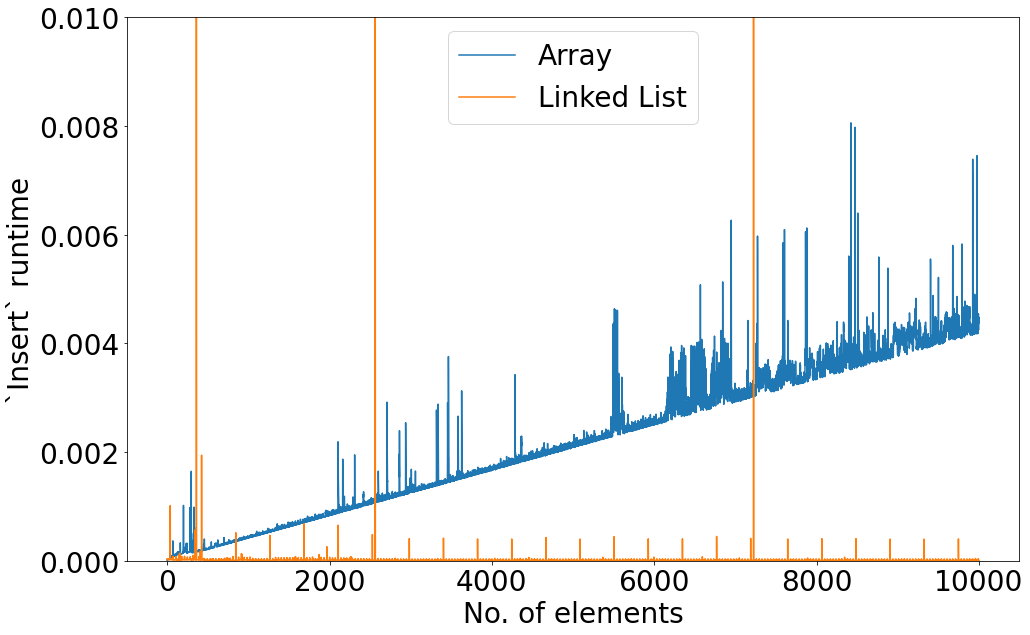

In [21]:
plt.figure(figsize = (16,10))
plt.rcParams.update({'font.size': 28})
plt.plot(runtimes, label="Array")
plt.plot(ll_runtimes, label="Linked List")
plt.xlabel("No. of elements")
plt.ylabel("`Insert` runtime")
plt.ylim(0,0.01)
plt.legend()

Okay, final example: assume you want a *dictionary* (and you do, quite often!). That is, have $N$ (different) strings mapped to some interesting data, to have the ability to find them quickly.

How to implement it?
- naive way: just check all $N$ elements to find *the* one.
- a better way... ?

of course, sort them alphabetically! So, spend $O(N\log N)$-ish time once, and then enjoy... like $O(\log N)$ access time, if you split it in halves every time! 

No, seriously: for $N=$ 1,000,000 words, naive find checks, well, 1,000,000 elements. While the smarter implementation -- no more than:

In [53]:
round(log2(1000000))

20

Let's see, though, what the Python's built-in `dictionary` class (see the [docs](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for more info) has to offer:

In [54]:
D = dict()
runtimes = []

for i in range(10000):
    t0 = time()
    for k in range(10):
        D["precious key {}/{}".format(i,k)] = "i={}, k={}".format(i,k)
    t1 = time()
    runtimes.append(t1-t0)

In [55]:
len(D)

100000

In [56]:
# as a "bonus" (actually, the whole point of it), we have:

D["precious key 5700/8"]

'i=5700, k=8'

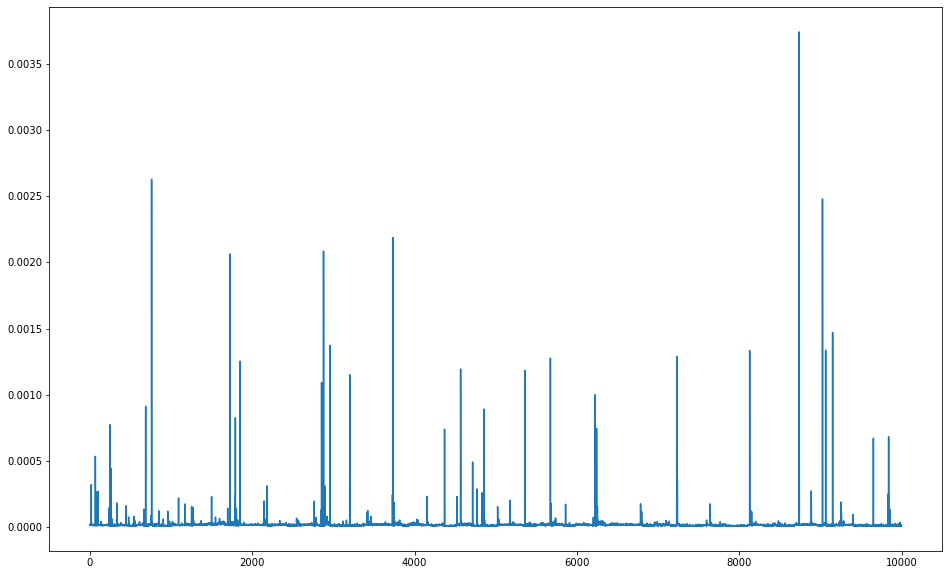

In [57]:
plt.figure(figsize = (16,10))
plt.plot(runtimes)

Again, 🤯🤯🤯

Indeed, it is constant-time access. $O(1)$. Kinda instantaneous.

Of course, special CS black magic. Google **"hash tables"** if interested. Note, though, it is not a beginner material. You might be better served by a textbook. 

**PROTIP:** To use it, you don't really need to understand deeply what's going on under the hood.

The idea is: there are **a lot** of cool data structures out there. You might not need to know all, but remember google stuff if you are implementing something. Some examples include:
- linked lists, [queues](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)) (`push`/`pop` operations a-la stack; $O(1)$ `insert`/`delete` operations), [deques](https://en.wikipedia.org/wiki/Double-ended_queue) (when you can slap an element in the beginning as well), etc.
- the all mighty dictionaries / [hash tables](https://en.wikipedia.org/wiki/Hash_table) (fast access/search times);
- the swiss army knife of CS, [binary search trees](https://en.wikipedia.org/wiki/Binary_search_tree) (well, do the binary search quickly :) ) and [heaps](https://en.wikipedia.org/wiki/Heap_(data_structure)) (find minimum in constant time. Guess what is a heap sort algo?)
- [union find](https://en.wikipedia.org/wiki/Disjoint-set_data_structure) -- keep track of a set partitioned into subsets. Very fast operations to: `union` two subsets and `find` if any two given elements are in the same subset.
- and quite some more...

There is some system here, like there are key topics: lists, hashing, trees, etc. Again, pick up a textbook if interested!

# Any ❓ -s?


# ✅  Grand Take-aways
- (Some) algorithms are cool
- They can (and should) be analyzed in a systematic, scientific way (correctness, asymptotic best/worst/etc. runtime, space, etc.)
- Asymptotic runtime: $O(\cdot)$ (and Co.) notations describe how does the runtime grow as the problem size increases. That's a big deal.
- There are theoretical limitations on what we can achieve, some problems are inherently hard.
- If so, we can cheat: make heuristics, approximations, run stuff in parallel, etc.
- There are several algo design principles you've seen now: divide & conquer, greedy, dynamic programming, ...
- Cool algorithms are numerous, and existing libraries are your friends (`numpy`, `sklearn`, etc. -- if we talk Python)
- If you are into *designing* (or understanding) algorithms, you'll need to get familiar with basic data structures. A good data structure is a game-changer. But this is a whole separate topic... Just make sure you know there is "dictionary"/hash table and binary search tree / heap out there (not necessarily how it works -- just what it does).

# The main part of the session: further reading
- see the course summary on GitHub.

**Good luck!**